# Classical vs Quantum Coin Flip

## Understanding Bits vs Qubits

This notebook demonstrates the fundamental difference between **classical bits** and **quantum bits (qubits)** using the simple example of a coin flip.

**Classical bit:** Can be either 0 **OR** 1 (one value at a time)  
**Quantum bit (qubit):** Can be 0 **AND** 1 simultaneously (superposition)

Let's explore this difference!

In [30]:
%matplotlib inline

## Classical Coin Flip

In classical computing, a bit is always in a **definite state**: either 0 or 1.

When we flip a classical coin, it will land on either heads (0) or tails (1). Before we look at it, we just don't know which one, but the coin itself is already in one state or the other.

In [5]:
import random

# Classical bit: 0 OR 1
coin = random.choice([0, 1])
print(f"Classical bit (coin flip): {coin}")

Classical bit (coin flip): 1


### Key Point: Classical Bit

- Always exactly **0 OR 1** (never both)
- **1 bit = 1 definite value** at any given time
- Even if we don't know the value, it's still definitely one or the other

## Quantum Coin Flip (Superposition!)

In quantum computing, a qubit can exist in **superposition** - a state where it is **both 0 AND 1 at the same time**!

This is fundamentally different from classical uncertainty. The qubit isn't "secretly" one value or the other - it genuinely exists in both states simultaneously until we measure it.

### The Hadamard Gate (H)

The **Hadamard gate** is the key to creating superposition:
- Takes a qubit in state |0⟩
- Transforms it to: $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
- This means: 50% probability of |0⟩ AND 50% probability of |1⟩

Let's see it in action!

Circuit in SUPERPOSITION (before measurement):
     ┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════
          

This qubit is in superposition: |0⟩ AND |1⟩ at the same time!


Circuit WITH MEASUREMENT (collapses to 0 or 1):
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Results from 1000 measurements:
Got 0: 494 times (~50%)
Got 1: 506 times (~50%)

Probability Distribution:


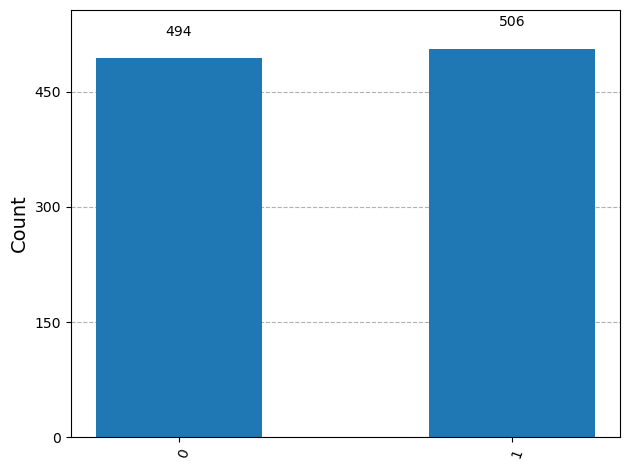

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Step 1: Create circuit with superposition (NO measurement yet)
qc_superposition = QuantumCircuit(1, 1)
qc_superposition.h(0)  # Apply Hadamard gate to create superposition

print("Circuit in SUPERPOSITION (before measurement):")
print(qc_superposition)
print("\n✨ This qubit is in superposition: |0⟩ AND |1⟩ at the same time!")
print("   It's not 'unknown' - it's genuinely BOTH states simultaneously!")

### What Happens When We Measure?

When we **measure** a qubit in superposition, something magical (and strange) happens:

1. **Quantum Collapse**: The superposition collapses to a single definite state
2. **Random Outcome**: We get either 0 or 1 (50% chance each)
3. **Information Lost**: After measurement, the qubit is no longer in superposition

This is called **wavefunction collapse** and it's one of the most mysterious aspects of quantum mechanics!

Let's add measurement and see what happens:

In [ ]:
# Step 2: Create circuit with measurement
qc_measured = QuantumCircuit(1, 1)
qc_measured.h(0)  # Apply Hadamard gate to create superposition
qc_measured.measure(0, 0)  # Add measurement - this collapses the superposition!

print("="*60)
print("\nCircuit WITH MEASUREMENT (collapses to 0 or 1):")
print(qc_measured)
print("\n💥 When we measure, the superposition collapses!")
print("   The qubit becomes either |0⟩ or |1⟩ (50% chance each)")

### Running the Quantum Coin Flip

Let's run the quantum coin flip 1000 times and see the probability distribution:

In [ ]:
# Step 3: Run simulation to show the 50/50 probability
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc_measured, shots=1000).result()
counts = result.get_counts()

print("="*60)
print("\n📊 Results from 1000 measurements:")
print(f"   Got 0: {counts.get('0', 0)} times (~{counts.get('0', 0)/10:.1f}%)")
print(f"   Got 1: {counts.get('1', 0)} times (~{counts.get('1', 0)/10:.1f}%)")
print("\n✓ Perfect 50/50 distribution (with small random variations)")
print("="*60)

In [ ]:
# Visualize the probability distribution
plot_histogram(counts, title='Quantum Coin Flip: 50/50 Superposition Results')

## 🎯 Key Differences: Classical vs Quantum

| Aspect | Classical Bit | Quantum Bit (Qubit) |
|--------|--------------|---------------------|
| **States** | 0 OR 1 | 0 AND 1 (superposition) |
| **Information** | 1 bit = 1 value | 1 qubit = both values simultaneously |
| **Measurement** | Just reveals existing state | Collapses superposition to single state |
| **Uncertainty** | We don't know which | It IS both until measured |

### Why This Matters

**Classical computing:** 
- 1 bit stores 1 value
- n bits store n values

**Quantum computing:**
- 1 qubit exists in 2 states simultaneously
- 2 qubits can represent 4 states at once
- n qubits can represent 2ⁿ states simultaneously!

This **exponential scaling** is what gives quantum computers their power! 💪

---

**Next Step:** Try creating superposition with multiple qubits and see how the state space grows exponentially! 🚀